# Sequence comparison - VECTORS

> a.k.a. distance measures

> read more: https://towardsdatascience.com/9-distance-measures-in-data-science-918109d069fa

Vector Similarity: The closeness (similarity, nearness) of the two records (vectors) with features $(x_{1},x_{2},...,x_{n})$ and $(u_{1},u_{2},...,u_{n})$ can be measured in different ways:
- Euclidean distance
- Cosine distance
- Manhattan distance
- p-distance with the Minkowski formula
These distance measures are used in algorithms such as k-NN, UMAP, HDBSCAN, etc. 

<img src="Media/distance-measures.png">


## Euclidean

- The length of a segment connecting two points. 
- Straight-line (crow's fly) distance between two points. 
- Linear distance between two points in a multi-dimensional space.

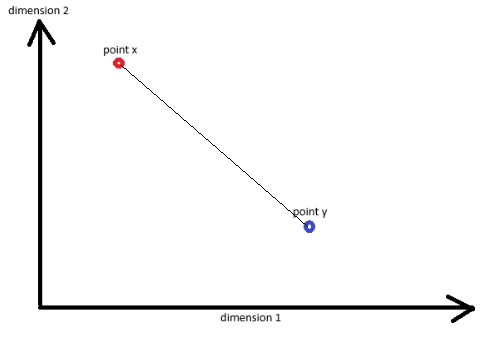

$$
\text{Euclidean distance: }
\\~\\
d(x,y) = \sqrt{ \sum^{n}_{i=1} (x_{i} - y_{i})^{2} } = \sqrt{(x_{1}-y_{1})^{2} + (x_{2}-y_{2})^{2} +...+(x_{n}-y_{n})^{2}} $$ 

<span style="color:green">**Advantages / when to use**</span>
- Is suitable for numerical continuous features;
- Is great for low-dimensional data where it is important to measure the magnitude of the vectors; 
- Very intuitite;
- Can handle outliers and noise well; 

<span style="color:red">**Disadvantages**</span>
- Can be affected by the curse of dimensionality (as the number of features increases, the distance between any two points becomes less meaningful and more similar) - euclidean distance <u>not as good in high dimensions / sparse data</u> https://stats.stackexchange.com/questions/99171/why-is-euclidean-distance-not-a-good-metric-in-high-dimensions;
- Is <u>affected by differential data scaling</u> (features need to be scaled / be on the same scale)
- If the data contains categorical or binary features, other distance metrics such as Hamming distance or Jaccard distance may be more appropriate



## Cosine

> https://www.datastax.com/guides/what-is-cosine-similarity

It's the cosine of the angle between two vectors. 

$$
d(x,y) = cos(\theta) = \cfrac{x*y}{||x||* ||y||}
$$

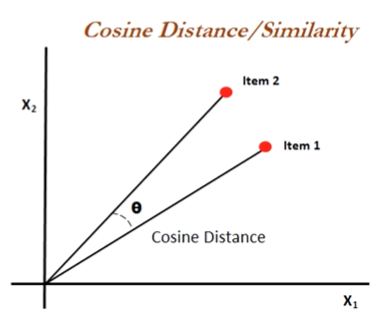

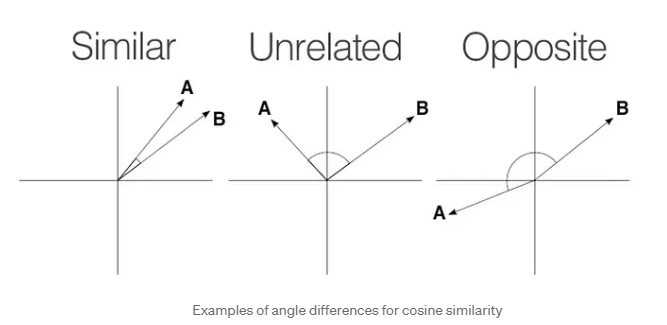

Cosine similarity: has a range of -1 (absolutely opposite vectors), 0 no correlation, 1 absolutely similar. 

$\text{Cosine distance} = 1 - \text{cosine similarity}$

Use cases:
- Comparing two documents for word frequency (NLP); 
- Recommendation systems;
- Provides a robust way to understand the semantic similarity between documents, datasets, or images; 

<span style="color:green">**Advantages / when to use**</span>
- Counteracts Euclidean distance's problem with high dimensions
- Use case: high-dimensional data and the magnitude of vectors is not important, e.g. comparing two documents for word frequency (comparing documents or strings represented as term frequency vectors)
- Can handle high-dimensional and sparse data well;
- Is beneficial in scenarios when you want to focus on directionality, rather than lengths, of the vectors.

<span style="color:red">**Disadvantages**</span>
- The magnitude of vectors is not taken into account, only their direction / angle (the differences in values are not fully taken into account, e.g. in a recommender system, the cosine similarity does not take into account the difference in rating scale between different users)
- Is affected by variable scaling (e.g. Z-score normalization)
- Semantic meaning is not considered, - rather, it uses term frequency


Usage example from NLP:

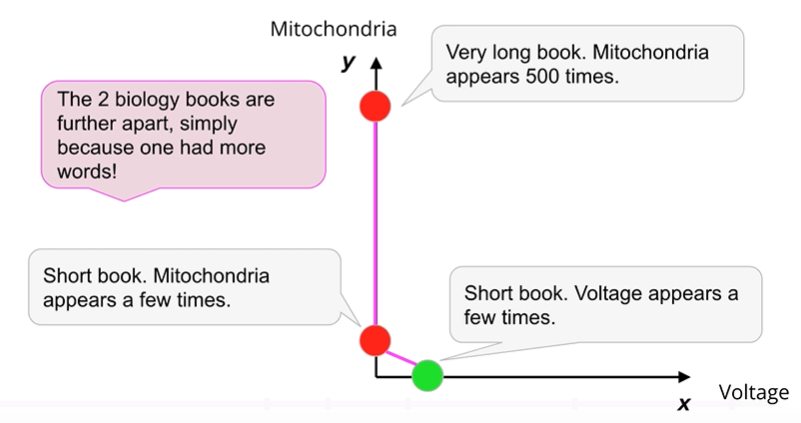

- Let's say we consider word counts of two words - Mitochondria and Voltage.
- We have two biology books - one very long (mitochondria appears 500 times) and one very short one (mitochondria appears a few times)
- The same we have with the physics books, but with the word "Voltage"
- If we were to use Euclidean distance to measure similarity, the short biology book would be closer to the short physics book (because of the low word count) than to the other long biology book! And vice versa with the short physics book
- So here we might better use Cosine distance

In [2]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity 

x = np.array([[1, 1, 1]])
y = np.array([[1, 1, 0]])
print(cosine_similarity(x, y))
single_value = float(cosine_similarity(x, y)[0][0])
print(single_value, type(single_value))

[[0.81649658]]
0.816496580927726 <class 'float'>


In [8]:
x = np.array([[0, 0, 0], [1, 1, 1]])
y = np.array([[1, 0, 0], [1, 1, 0]])
cosine_similarity(x, y)

array([[0.        , 0.        ],
       [0.57735027, 0.81649658]])

## Hamming

- "In information theory, the Hamming distance between two strings or vectors of equal length is the number of positions at which the corresponding symbols are different. In other words, it measures the minimum number of substitutions required to change one string into the other, or equivalently, the minimum number of errors that could have transformed one string into the other." 
- The number of values that are different between two vectors

Formula is pretty complicated, so let's consider this example instead. If $A = 101101$, $B = 100111$, then $d_{\text{hamming}} = 2$

It is used for categorical and binary features. |

Examples of use:
- Error correction/detection when data is transmitted over computer network; 
- Determine the number of distorted bits in a binary word as a way to estimate error;

<span style="color:green">**Advantages / when to use**</span>
- It is used for categorical and binary features;

<span style="color:red">**Disadvantages**</span>
- Does not take into the account the actual values, as long as they are different or equal; 


## Manhattan 

> a.k.a. Manhattan distance, city block / taxicab distance

Definitions:
- Distance between two points if calculated going through each dimension (feature) at a time. 
- The distance between two vectors if they could only move right angles (e.g. within each dimension) and no diagonal movement is possible.

$$ d(x,y) = \sum^{n}_{i=1} |x_{i} - y_{i}| = |x_{1}-u_{1}| + |x_{2}-u_{2}| + ... + |x_{n}-u_{n}| $$

<span style="color:green">**Advantages / when to use**</span>
- Works fine for high-dimensional data, with discrete and / or binary variables

<span style="color:red">**Disadvantages**</span>
- The measure is somewhat less intuitive than euclidean distance, especially in high-dimensional data



The Manhattan distance can be used with numerical continuous variables; it is also suitable for data that has discrete and categorical features, as it does not penalize small differences as much as the Euclidean distance. It can also handle high-dimensional data better, as it is less sensitive to the curse of dimensionality. However, it can be influenced by the orientation and scale of the features, as it assumes that all directions are equally important and all units are comparable. |

## Chebyshev

> The greatest of difference between two vectors along any coordinate dimension. 
> The maximum distance along one axis

$$d(x,y) = max_{i} (|x_{i} - y_{i}|)$$

<span style="color:green">**Advantages / when to use**</span>
- Can be used to extract the minimum number of moves needed to go from one square to another
- Can be a useful measure in games that allow unrestricted 8-way movement

<span style="color:red">**Disadvantages**</span>
- Is typically used in very specific use-cases, and is not as useful as an all-purpose distance metric like Euclidean or Cosine; is suggested to be used only when you are sure that is it suitable for your use case

## Minkowski

A more general distance metric for KNN is the Minkowski distance, which is a generalization of the Euclidean and Manhattan distances. It is defined by a parameter p that controls how much emphasis is given to larger or smaller differences between coordinates. The Minkowski distance can be seen as a family of distance metrics that includes the Euclidean distance $(p = 2)$, the Manhattan distance $(p = 1)$, and the Chebyshev distance $(p = \text{infinity})$, which is the maximum of the absolute differences between coordinates.

$$d(x, y) = \left( \sum^{n}_{i=1} \| x_{i} - y_{i} \| ^{p} \right)^{\cfrac{1}{p}} $$

<span style="color:green">**Advantages / when to use**</span>
- Is suitable for data that has mixed types of features, as it allows you to adjust the parameter $p$ to balance the importance of different features and distances

<span style="color:red">**Disadvantages**</span>
- Minkowski has the same disadvantages as the distance measures they represent; 
- It can be computationally expensive to find the right value of parameter $p$ and difficult to interpret, as the parameter can have different efects on different data sets and problems


## Jaccard

> a.k.a. Intersection over Union, Jaccard index

- The Jaccard distance is a measure of dissimilarity between two sets. 
- It is defined as the size of the symmetric difference of the sets divided by the size of their union. 
- Calculates the similarity and diversity of sample sets
- The size of intersection divided by the size of the union of the sample sets

$$d(x, y) = 1 - \frac{| x \cap y |}{ | x \cup y |}$$

Examples of use:
- In Computer Vision, assessing accuracy for each predicted class compared with the total number of instances for a class (or for image segmentation)
- In text similarity analysis to measure how much word choice overlap there is between documents (to compare sets of patterns)

<span style="color:green">**Advantages / when to use**</span>
- Very simple metric;
- Often used in applications where binary or binarised data is used
- 

<span style="color:red">**Disadvantages**</span>
- Can only use with qualitative nominal;
- Highly influenced by the size of the data - large datasets can have a big impact on the index as it could significantly increase the union whilst keeping the intersection similar


In [8]:
import textdistance as td

"""
classical implementation of jaccard doesn't consider repeats, 
as you use sets.

This implementation of textdistance jaccard does
consider repeats as separate entities
"""

a = ['here', 'is', 'a', 'list', 'of', 'tokens']
b = ['here', 'is', 'a', 'list']
c = ['a', 'list', 'here', 'is']
display( td.jaccard(a, b) )
display( td.jaccard(b, c) )

0.6666666666666666

1.0

## Sorensen-Dice Index

Features:
- Very similar to Jaccard Index.
- Calculated by finding the ratio of twice the number of shared elements (intersection) between the sets to the sum of the sizes of the sets.

Use cases:
- Also used in Computer vision;
- Data Analysis, Text Mining, Image Processing

$$d(x,y) = \cfrac{2|x \cap y|}{|x| + |y|}$$


In [9]:
import textdistance as td

a = ['here', 'is', 'a', 'list', 'of', 'tokens']
b = ['here', 'is', 'a', 'list']
c = ['a', 'list', 'here', 'is']
td.sorensen(a, b)

0.8

## Haversine

The distance between two points on a sphere given their longitudes and latitudes. 

# Sequence comparison - TEXT

We can roughly subdivide string similarity algorithms into three types:
- Edit-based (distance-based): measure the minimum number of single-character operations (insertions, deletions, or substitutions) required to transform one string into another. The more operations we'll have the greater the distance, and the less the similarity, will be. These include Levenshtein, Hamming, etc.
- Token-based algorithms: these are basically vector comparison algorithms, as you compare vectors of characters or words; Jaccard, Dice, Cosine, etc.
- Sequence-based algorithms: Smith-Waterman, BLAST, - algorithms for aligning two sequences. 


## String similarity

> a.k.a. string metric, string similarity metric, string distance function

> An excellent resource: https://yassineelkhal.medium.com/the-complete-guide-to-string-similarity-algorithms-1290ad07c6b7

Algorithms:
- Embeddings
- Levenshtein distance
- Hamming distance
- Smith-Waterman distance

Used in:
- Spell checking
- Autocorrection
- DNA sequence analysis

### Hamming

- **Hamming distance**: the number of characters that are different in two equal length strings;
- Can also be expressed as Hamming similarity and expressed as a fraction between 0 and 1;
- If you overlay two strings of the same length, how many positions will have different characters; 
- <u>Allows only substitution</u>

Use cases:
- Comparing two sequences of bytes

<span style="color:green">**Advantages / when to use**</span>

<span style="color:red">**Disadvantages**</span>
- Strings have to be of matching lengths;


In [1]:
def hamming_distance(str1, str2):
    assert len(str1) == len(str2)
    hamming_distance = 0
    for i, j in zip(str1, str2):
        if i != j:
            hamming_distance += 1
    return hamming_distance

a = 'crook'
b = 'shook'
hamming_distance(a, b)

2

In [5]:
import textdistance as td

a = 'book'
b = 'look'
print( td.hamming(a, b) )
print( td.hamming.normalized_similarity(a, b) ) # 3 / 4

1
0.75


In [4]:
c = 'below'
d = 'bellow'
print( td.hamming(c, d) ) # it automatically transforms 'below' into 'below_' to match the length of the second string, as hamming distance can only deal with equal-length strings
print( td.hamming.normalized_similarity(c, d) )

3
0.5


### Levenshtein

**Levenshtein distance**: the minimum number of three single-character edits (insertions, deletions, or substitutions) required to change one string into the other. 

Can be expressed as **Levenshtein similarity** (0-1);

Use cases:
- Spell checking / autocorrect algorithms
- DNA sequence comparison

Advantages:
- Strings do not have to be the same length;

In [1]:
import textdistance as td

# we can replace one letter by another to get the other word, so normalized similarity is (4-1)/4 = 75%
a = 'book'
b = 'look'
print(f"""
Levenshtein distance: {td.levenshtein(a, b)}
Levenshtein normalized similarity: {td.levenshtein.normalized_similarity(a, b)}
""")



Levenshtein distance: 1
Levenshtein normalized similarity: 0.75



In [9]:
c = 'act'
d = 'cat'
print( td.levenshtein(c, d) )
print( td.levenshtein.normalized_similarity(c, d) )

2
0.33333333333333337


In [10]:
# we have one insertion operation, so the distance is 1 and the normalized similarity is (6-1)/6 = 84%
a = 'below'
b = 'bellow'
print( td.levenshtein(a, b) )
print( td.levenshtein.normalized_similarity(a, b) )


1
0.8333333333333334


In [11]:
a = 'below'
b = 'mellow'
print( td.levenshtein(a, b) )
print( td.levenshtein.normalized_similarity(a, b) )

2
0.6666666666666667


### Damerau-Levenshtein distance

This algorithm is a variation of the Levenshtein distance that also includes the transposition operation (swapping two <u>adjacent characters</u>). The number of four operations (insertions, deletions, substitutions, or transposition) required to transform one string to another.  

Usage:
- NLP fields - spell checking and sequence analysis


In [ ]:
# !pip install textdistance

In [14]:
import textdistance as td

a = 'acts'
b = 'cats'
print( td.damerau_levenshtein(a, b) )
print( td.damerau_levenshtein.normalized_similarity(a, b) )

1
0.75


In [13]:
a = 'aaaaaa'
b = '_aaa_a'
print( td.damerau_levenshtein(a, b) )
print( td.damerau_levenshtein.normalized_similarity(a, b) )


2
0.6666666666666667


### Jaro similarity

> Not a distance but a similarity score between 0 and 1.

Jaro is an algorithm based on the number of matching characters and on transpositions like the Damerau-Levenstein do except we don’t have the adjacency constraint. The method uses an intuitive formula:

$$
\text{Jaro similarity formula:}
\\~\\
d_{j_{s_{1}, s_{2}}} = 
    \frac{1}{3} 
    \left( 
        \frac{m}{|s_{1}|} + \frac{m}{|s_{2}|} + \frac{m-t}{m}
    \right) \text{ , where: }
\\~\\
\begin{split}
    & d_{j_{s_{1}, s_{2}}} : \text{Jaro distance between string $s_{1}$ and $s_{2}$} \\
    & m : \text{the number of matching characters between $s_{1}$ and $s_{2}$. } \\
    & t : \text{the number of transpositions needed to do} \\
    & |s_{1}| : \text{the length of the first string $s_{1}$} \\
    & |s_{2}| : \text{the length of the second string $s_{2}$} \\
\end{split}
$$

> Two characters from $s_{1}$ and $s_{2}$ respectively are considered matching only if they are the same and not farther than $\cfrac{max(|s_{1}|, |s_{2}|)}{2} - 1$ characters apart.




In [15]:
"""
we have 5 matching characters 
and one insertion (this is not a transposition operation) 
so the Jaro similarity is 1/3*(5/6+5/5+6/6). 
"""
a = 'bellow'
b = 'below'
td.jaro(a, b)

0.9444444444444445

In [16]:
"""
we have 0 matching characters 
because the common characters are not in the range of max(|s1|, |s2|)/2–1. 
This is why the jaro similarity is 0. 
"""
a = 'simple'
b = 'plesim'
td.jaro(a, b)

0.0

In [18]:
"""
The final example we have 4 matching characters and 
1 transposition operation between the first and second letter 
so the Jaro similarity is 1/3 * (4/4+4/4+3/4) = 0.91
"""
a = 'jaro'
b = 'ajro'
td.jaro(a, b)

0.9166666666666666

### Jaro-Winkler

> https://en.wikipedia.org/wiki/Jaro%E2%80%93Winkler_distance

The Jaro winkler is a modification of Jaro similarity. 

It is designed to give more weight to the common prefix of the strings (so it gives a more favourable rating to strings that match from the beginning). This is going to give greater score to strings that have the first l characters in common. Its formula is:

$$
\text{Jaro-Winkler similarity:}
\\~\\
\text{sim$_w$} = \text{sim$_j$} + lp(1 - \text{sim$_j$})
\\~\\
\begin{split}
    & \text{sim$_j$ : Jaro similarity for strings $s_1$ and $s_2$} \\
    & \text{$l$ : length of common prefix at the start of the string up to a max of 4 characters} \\
    & \text{$p$ : constant scaling factor for how much the score is adjusted upwards for having common prefixes.} \\
\end{split}
$$

$$
\text{Jaro-Winkler distance : }
\\~\\
d_{w} = 1 - \text{sim$_w$}
$$

Use cases:
- d

In [19]:
td.jaro("simple", "since")


0.7000000000000001

In [21]:
td.jaro_winkler("simple", "since")


0.76

### Smith-Waterman similarity

This one is normally used for sequence alignment, however, you can also get a similarity score.

In [5]:
import textdistance as td

a = 'GATTACA'
b = 'GCATGCU'
display( td.smith_waterman(a, b) )
display( td.smith_waterman.normalized_similarity(a, b) )

3.0

0.4285714285714286

## Sequence alignment

- Brute force
- Needleman-Wunsch
- Smith-Waterman
- BLAST


In [ ]:
"""
GATTAGACCAT
GATCAGACTAT

GATTAGACCAT
GATGAC

GATTAGACCAT
TAGA




match =+1
gap =-1
mismatch =0

GATTAGACCAT
___TAGA____

GATTAGACCAT
___TAG___A_



GATTAGACCAT
   TAGA    
"""

